In [28]:
!pip install lime

In [29]:
#Basic Dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

In [30]:
#Read training Data
df_train = pd.read_csv("/content/drive/My Drive/Machine_Hack/Data/Train.csv")
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [31]:
#Read testing data
df_test = pd.read_csv("/content/drive/My Drive/Machine_Hack/Data/Test.csv")
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [32]:
#Column Types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    122049 non-null  int64  
 1   StockCode    122049 non-null  int64  
 2   Description  122049 non-null  int64  
 3   Quantity     122049 non-null  int64  
 4   InvoiceDate  122049 non-null  object 
 5   CustomerID   122049 non-null  float64
 6   Country      122049 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


In [34]:
df_train.drop(['InvoiceNo','InvoiceDate'], inplace=True , axis=1)
df_test.drop(['InvoiceNo','InvoiceDate'], inplace=True , axis=1)

In [35]:
#Basic Stats
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
StockCode,284780.0,1573.386807,843.604991,0.0,939.00,1521.00,2106.00,3683.0
Description,284780.0,2023.955573,1089.812078,0.0,1141.00,1987.00,2945.00,3895.0
Quantity,284780.0,12.028468,295.111588,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,284780.0,3.451216,78.399541,0.0,1.25,1.95,3.75,38970.0
CustomerID,284780.0,15288.224278,1714.336529,12346.0,13953.00,15152.00,16794.00,18287.0
Country,284780.0,32.823846,6.743602,0.0,35.00,35.00,35.00,36.0


In [36]:
#Basic Stats
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
StockCode,122049.0,1572.955788,845.106082,0.0,937.0,1523.0,2106.0,3683.0
Description,122049.0,2026.412744,1087.697388,0.0,1147.0,1987.0,2945.0,3895.0
Quantity,122049.0,12.137920,54.311646,-9360.0,2.0,5.0,12.0,4800.0
CustomerID,122049.0,15286.445256,1711.887591,12347.0,13953.0,15152.0,16782.0,18287.0
Country,122049.0,32.836795,6.726816,0.0,35.0,35.0,35.0,36.0


In [37]:
df_train.isnull().sum()

StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [38]:
df_test.isnull().sum()

StockCode      0
Description    0
Quantity       0
CustomerID     0
Country        0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


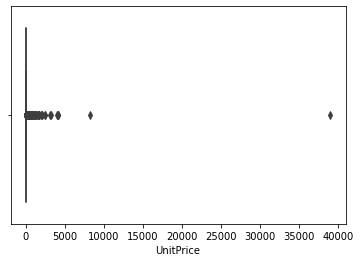

In [39]:
sns.boxplot('UnitPrice', data=df_train)

In [40]:
df_train[df_train.UnitPrice > 8000].describe()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,2.000000,2.000000,2.0,2.00000,2.000000,2.0
mean,3682.000000,2382.000000,-1.0,23556.37500,15563.500000,35.0
std,1.414214,342.239682,0.0,21798.15752,658.316413,0.0
min,3681.000000,2140.000000,-1.0,8142.75000,15098.000000,35.0
25%,3681.500000,2261.000000,-1.0,15849.56250,15330.750000,35.0
50%,3682.000000,2382.000000,-1.0,23556.37500,15563.500000,35.0
75%,3682.500000,2503.000000,-1.0,31263.18750,15796.250000,35.0
max,3683.000000,2624.000000,-1.0,38970.00000,16029.000000,35.0


In [41]:
df_train[df_train.UnitPrice > 2000].count()

StockCode      12
Description    12
Quantity       12
UnitPrice      12
CustomerID     12
Country        12
dtype: int64

In [42]:
df_train.drop(df_train[df_train.UnitPrice > 2000].index, inplace= True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


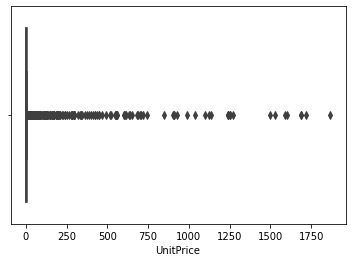

In [43]:
sns.boxplot('UnitPrice', data=df_train)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284768 entries, 0 to 284779
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    284768 non-null  int64  
 1   Description  284768 non-null  int64  
 2   Quantity     284768 non-null  int64  
 3   UnitPrice    284768 non-null  float64
 4   CustomerID   284768 non-null  float64
 5   Country      284768 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 15.2 MB


In [45]:
features = ['StockCode','Description','CustomerID','Quantity']
#X = df_train[features]
#X = X.dropna()
#X

In [46]:
#y = df_train["UnitPrice"]

In [47]:
## split data
dtf_train, dtf_test = model_selection.train_test_split(df_train, 
                      test_size=0.1)
## print info
print("X_train shape:", dtf_train.drop("UnitPrice",axis=1).shape, "| X_test shape:", dtf_test.drop("UnitPrice",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["UnitPrice"]),2), "| y_test mean:", round(np.mean(dtf_test["UnitPrice"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("UnitPrice",axis=1).columns.to_list())

X_train shape: (256291, 5) | X_test shape: (28477, 5)
y_train mean: 3.19 | y_test mean: 3.06
6 features: ['StockCode', 'Description', 'Quantity', 'CustomerID', 'Country']


In [48]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf_train.drop("UnitPrice", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop("UnitPrice", 
                        axis=1).columns, index=dtf_train.index)
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_scaled['UnitPrice'] = scalerY.fit_transform(
                    dtf_train['UnitPrice'].values.reshape(-1,1))
dtf_scaled.head()

,StockCode,Description,Quantity,CustomerID,Country,UnitPrice
86217,-0.207904,-0.113636,9.5,-0.614517,0.0,-0.064
132900,0.946735,-0.528825,-0.3,-0.405215,0.0,2.400
116806,1.568729,-0.669069,1.9,0.121917,0.0,-0.440
74976,-0.373711,-0.868625,-0.1,-0.959831,-23.0,2.620
171301,0.344502,0.378049,-0.4,0.744891,0.0,0.052


Text(0.5, 1.0, 'pearson correlation')

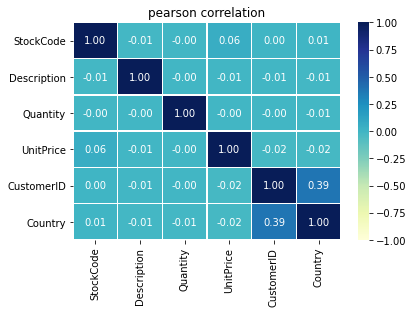

In [49]:
corr_matrix = dtf_train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

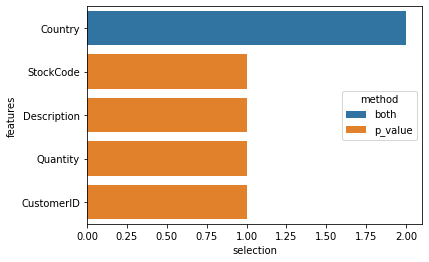

In [50]:
X = dtf_train.drop("UnitPrice", axis=1).values
y = dtf_train["UnitPrice"].values
feature_names = dtf_train.drop("UnitPrice", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_regression, k=5).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=5).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

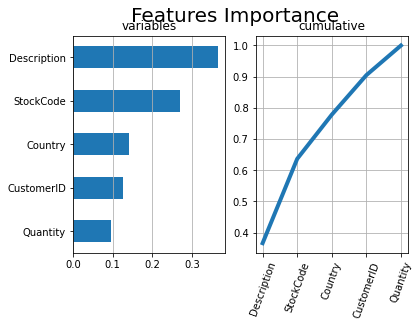

In [51]:
X = dtf_train.drop("UnitPrice", axis=1).values
y = dtf_train["UnitPrice"].values
feature_names = dtf_train.drop("UnitPrice", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [52]:
X_train = dtf_train.values
y_train = dtf_train["UnitPrice"].values
X_test = dtf_test.values
y_test = dtf_test["UnitPrice"].values

In [53]:
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
'''model = RandomForestRegressor(bootstrap=True, ccp_alpha=0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)'''
#model = svm.SVR()
model = tree.DecisionTreeRegressor()
#model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

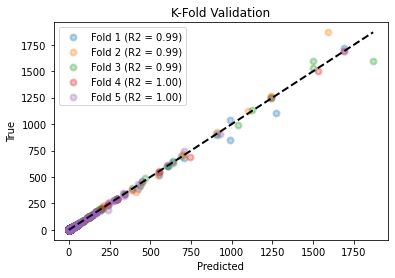

In [54]:
## call model
#model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [55]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)

In [56]:
predicted = scalerY.inverse_transform( 
                  predicted.reshape(-1,1) ).reshape(-1)

In [57]:
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
## residuals
residuals = y_test - predicted
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], predicted[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

R2 (explained variance): -1.65
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.73
Mean Absolute Error (Σ|y-pred|/n): 7
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 16.76
Max Error: -1,865


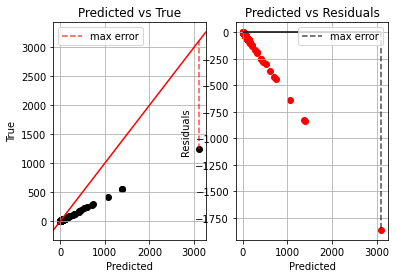

In [58]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(predicted, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(predicted), xmax=np.max(predicted))
ax[1].legend()
plt.show()

In [60]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

RMSE: 16.76362742083347
